# Статистика, занятие 12

Составитель: Ҳакимов Раҳматҷон. Email: rahmatjon@gmail.com. Telegram: https://t.me/rahmatjon_hakimov

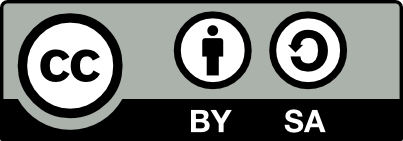

### **Простая линейная регрессия**
Простая линейная регрессия используется для моделирования линейной зависимости между двумя переменными: независимой переменной \(X\) и зависимой переменной \(Y\). Формула линейной регрессии выглядит так:
$$Y = b_0 + b_1 \cdot X$$
Где:
- $ b_0 $ — свободный член (intercept), это значение $Y$, когда $X = 0$.
- $ b_1 $ — коэффициент наклона (slope), показывает, как изменяется $Y$ при изменении $X$.

### Вычисление коэффициентов:

1. **Коэффициент наклона $b_1$**:
$$b_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$$
2. **Свободный член \(b_0\)**:
$$b_0 = \bar{Y} - b_1 \cdot \bar{X}$

### Пример на Python:

Коэффициент наклона (b1): 1.91
Свободный член (b0): 3.43


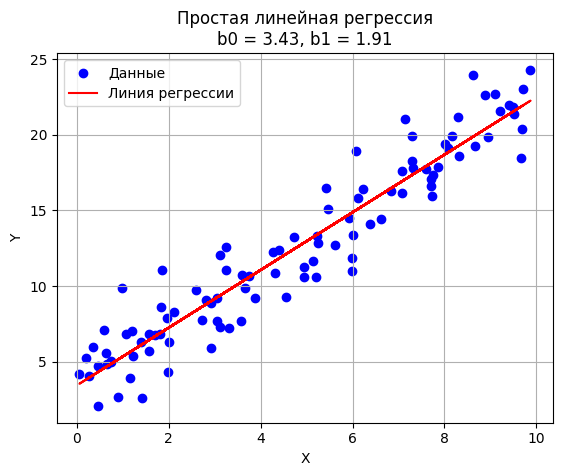

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(42)
X = np.random.rand(100) * 10  # 100 случайных точек от 0 до 10
Y = 2 * X + 3 + np.random.randn(100) * 2  # Линейная зависимость с шумом

# Вычисление средних значений
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Вычисление коэффициента наклона (b1)
numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sum((X - X_mean)**2)
b1 = numerator / denominator

# Вычисление свободного члена (b0)
b0 = Y_mean - b1 * X_mean

print(f"Коэффициент наклона (b1): {b1:.2f}")
print(f"Свободный член (b0): {b0:.2f}")

# Предсказание значений Y
Y_pred = b0 + b1 * X

# Построение графика
plt.scatter(X, Y, label="Данные", color="blue")
plt.plot(X, Y_pred, color='red', label="Линия регрессии")
plt.title(f"Простая линейная регрессия\nb0 = {b0:.2f}, b1 = {b1:.2f}")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

### Объяснение кода:
- Мы генерируем линейную зависимость между переменными \(X\) и \(Y\) с добавлением шума.
- Коэффициенты \(b_1\) и \(b_0\) вычисляются вручную.
- Выводятся найденные коэффициенты, строится график с линией регрессии.

### Ожидаемый результат:
Этот код отобразит график с исходными точками данных и линейной линией тренда, соответствующей простой линейной регрессии.

### **Множественная линейная регрессия**

Множественная линейная регрессия используется, когда у нас есть несколько независимых переменных (факторов), которые влияют на зависимую переменную. Модель множественной линейной регрессии имеет вид:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon$$
где:
- $y$ — зависимая переменная,
- $x_1, x_2, \dots, x_n$ — независимые переменные,
- $\beta_0$ — свободный член (интерсепт),
- $\beta_1, \beta_2, \dots, \beta_n$ — коэффициенты регрессии,
- $\epsilon$ — ошибка модели.

### Пример множественной линейной регрессии на Python:

1. Генерируем данные с четырьмя независимыми переменными.
2. Обучаем модель множественной линейной регрессии.
3. Вычисляем коэффициенты регрессии.

### Пример кода:

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Генерация данных
np.random.seed(42)
n_samples = 100
x1 = np.random.rand(n_samples) * 10  # Независимая переменная 1
x2 = np.random.rand(n_samples) * 10  # Независимая переменная 2
x3 = np.random.rand(n_samples) * 10  # Независимая переменная 3
x4 = np.random.rand(n_samples) * 10  # Независимая переменная 4
# Зависимая переменная с линейной зависимостью от x1 и x2 с добавлением шума
y = 3 * x1 + 5 * x2 - 7 * x3 + 1.5 * x4+ np.random.randn(n_samples) * 2

# Создание датафрейма для удобства
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'y': y})

# Модель множественной линейной регрессии
X = data[['x1', 'x2', 'x3', 'x4']]  # Матрица независимых переменных
y = data['y']  # Зависимая переменная

model = LinearRegression()
model.fit(X, y)

# Коэффициенты регрессии
intercept = model.intercept_  # Свободный член (интерсепт)
coefficients = model.coef_  # Коэффициенты при x1, x2, x3, x4

print(f"Свободный член (интерсепт): {intercept:.2f}")
print(f"Коэффициенты при переменных x1, x2, x3, x4: {coefficients}")

# Прогнозирование на основе модели
y_pred = model.predict(X)

# Добавим результаты в таблицу для сравнения
data['y_pred'] = y_pred
print(data.head())  # Печатаем первые несколько строк с реальными и предсказанными значениями

# Проверка качества модели (например, среднеквадратичная ошибка)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")

Свободный член (интерсепт): 0.34
Коэффициенты при переменных x1, x2, x3, x4: [ 2.96235913  4.98284175 -7.04125992  1.5442824 ]
         x1        x2        x3        x4          y     y_pred
0  3.745401  0.314292  6.420316  0.516817 -28.748369 -31.412155
1  9.507143  6.364104  0.841400  5.313546  62.464479  62.491558
2  7.319939  3.143560  1.616287  5.406351  35.837040  34.651945
3  5.986585  5.085707  8.985542  6.374299 -10.569589 -10.014571
4  1.560186  9.075665  6.064291  7.260913  19.148551  18.692648
Среднеквадратичная ошибка (MSE): 3.23


### **Шаги вычисления коэффициентов методом наименьших квадратов:**

1. **Сбор данных**: Подготовить данные, состоящие из одной зависимой переменной и нескольких независимых переменных.
2. **Формирование матрицы признаков**: Создать матрицу, где строки соответствуют наблюдениям, а столбцы — независимым переменным. Включите также столбец единиц для интерсепта.
3. **Вычисление коэффициентов**: Использовать формулу для вычисления коэффициентов:
   $$\beta = (X^T X)^{-1} X^T y$$
   где $X$ — матрица признаков, а $y$ — вектор зависимой переменной.
4. **Оценка модели**: Оценить качество модели, например, с помощью $R^2$ или среднеквадратичной ошибки (MSE).

### Пример на Python с использованием `numpy`:

In [9]:
import numpy as np

# Шаг 1: Сбор данных
# Создадим пример данных с четырьмя независимыми переменными
np.random.seed(42)
n_samples = 100

# Независимые переменные
X1 = np.random.rand(n_samples) * 10
X2 = np.random.rand(n_samples) * 5
X3 = np.random.rand(n_samples) * 3
X4 = np.random.rand(n_samples) * 2

# Зависимая переменная с шумом
y = 3 + 2 * X1 - 1 * X2 + 0.5 * X3 + 1.5 * X4 + np.random.randn(n_samples) * 0.5

# Шаг 2: Формирование матрицы признаков
X = np.column_stack((np.ones(n_samples), X1, X2, X3, X4))  # Добавляем столбец единиц для интерсепта
print("Матрица признаков:")
print(X)

# Шаг 3: Вычисление коэффициентов методом наименьших квадратов
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print("Коэффициенты регрессии:", beta)

# Шаг 4: Оценка модели
y_pred = X @ beta  # Предсказанные значения
mse = np.mean((y - y_pred) ** 2)  # Среднеквадратичная ошибка
r_squared = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))  # Коэффициент детерминации

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r_squared:.2f}")

Матрица признаков:
[[1.         3.74540119 0.15714593 1.92609494 0.10336344]
 [1.         9.50714306 3.18205206 0.25241989 1.06270926]
 [1.         7.31993942 1.57177991 0.48488614 1.08127024]
 [1.         5.98658484 2.54285346 2.69566257 1.2748598 ]
 [1.         1.5601864  4.53783237 1.81928718 1.45218267]
 [1.         1.5599452  1.24646115 0.02759115 1.95170416]
 [1.         0.58083612 2.05191462 0.30441463 1.0326007 ]
 [1.         8.66176146 3.77775569 1.99050531 0.64591295]
 [1.         6.01115012 1.14399083 0.01518475 1.59037239]
 [1.         7.08072578 0.38489955 0.48242415 0.5416645 ]
 [1.         0.20584494 1.44875726 1.64620137 0.87794284]
 [1.         9.69909852 0.80610644 2.07568559 0.15691276]
 [1.         8.32442641 4.64848826 1.95588378 0.05070149]
 [1.         2.12339111 4.0406019  0.67280793 1.92529683]
 [1.         1.81824967 3.16701878 2.13653766 1.67196024]
 [1.         1.8340451  4.35730295 0.71174726 1.39194841]
 [1.         3.04242243 4.01836038 0.97619909 0.81790